In [3]:
import torch.nn as nn
import numpy as np
import torch
import torch.optim as optim

In [4]:
torch.set_printoptions(edgeitems=2, linewidth=75)

In [5]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [6]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([6, 1, 3, 2, 4, 5, 0, 8, 9]), tensor([10,  7]))

In [11]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

t_u_train, t_c_train, t_u_val, t_c_val, t_un_train, t_un_val

(tensor([[33.9000],
         [55.9000],
         [81.9000],
         [58.2000],
         [56.3000],
         [48.9000],
         [35.7000],
         [48.4000],
         [60.4000]]),
 tensor([[ 3.0000],
         [14.0000],
         [28.0000],
         [15.0000],
         [11.0000],
         [ 8.0000],
         [ 0.5000],
         [ 6.0000],
         [13.0000]]),
 tensor([[68.4000],
         [21.8000]]),
 tensor([[21.],
         [-4.]]),
 tensor([[3.3900],
         [5.5900],
         [8.1900],
         [5.8200],
         [5.6300],
         [4.8900],
         [3.5700],
         [4.8400],
         [6.0400]]),
 tensor([[6.8400],
         [2.1800]]))

In [10]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[5.7295],
        [2.4553]], grad_fn=<AddmmBackward0>)

In [12]:
linear_model.weight

Parameter containing:
tensor([[0.7026]], requires_grad=True)

In [13]:
linear_model.bias

Parameter containing:
tensor([0.9235], requires_grad=True)

In [14]:
x = torch.ones(1)
linear_model(x)

tensor([1.6262], grad_fn=<AddBackward0>)

In [15]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262],
        [1.6262]], grad_fn=<AddmmBackward0>)

In [18]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

In [19]:
linear_model.parameters()

<generator object Module.parameters at 0x000001AD3130C350>

In [20]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0846]], requires_grad=True),
 Parameter containing:
 tensor([0.0341], requires_grad=True)]

In [23]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_train, t_c_train)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"  f" Validation loss {loss_val.item():.4f}")

In [24]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) 
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs = 3000, optimizer = optimizer, model = linear_model, loss_fn = loss_fn, t_u_train = t_un_train,
t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 334.6479, Validation loss 334.6479
Epoch 1000, Training loss 5.0132, Validation loss 5.0132
Epoch 2000, Training loss 3.0486, Validation loss 3.0486
Epoch 3000, Training loss 2.8588, Validation loss 2.8588

Parameter containing:
tensor([[5.4269]], requires_grad=True)
Parameter containing:
tensor([-17.9409], requires_grad=True)


In [26]:
seq_model = nn.Sequential(nn.Linear(1, 13), nn.Tanh(), nn.Linear(13,1))

In [27]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [28]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [34]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [37]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [38]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0515], requires_grad=True)

In [39]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(n_epochs = 5000, optimizer=optimizer, model = seq_model, loss_fn=nn.MSELoss(), t_u_train = t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

Epoch 1, Training loss 176.9414, Validation loss 176.9414
Epoch 1000, Training loss 6.8500, Validation loss 6.8500
Epoch 2000, Training loss 4.4404, Validation loss 4.4404
Epoch 3000, Training loss 2.8248, Validation loss 2.8248
Epoch 4000, Training loss 2.4019, Validation loss 2.4019
Epoch 5000, Training loss 2.2670, Validation loss 2.2670


In [40]:
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[21.3241],
        [-2.0859]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [-4.]])
hidden tensor([[ 9.7297e-03],
        [ 1.7374e-02],
        [ 7.2684e-01],
        [ 1.1713e+01],
        [ 1.2287e+01],
        [ 1.1306e+01],
        [-1.1395e+01],
        [ 4.9782e-01]])


In [41]:
from matplotlib import pyplot as plt

In [42]:
t_range = torch.arange(20., 90.).unsqueeze(1)
t_range

tensor([[20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.],
        [60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [66.],
        [67.],
        [68.],
        [69.],
        [70.],
        [71.],
        [72.],
        [73.],
        [74.],
        [75.],
        [76.],
        [77.],
        [78.],
        [79.],
        [80.],
        [81.],
        [82.],
        [83.],
        [84.],
        [85.],
        [8

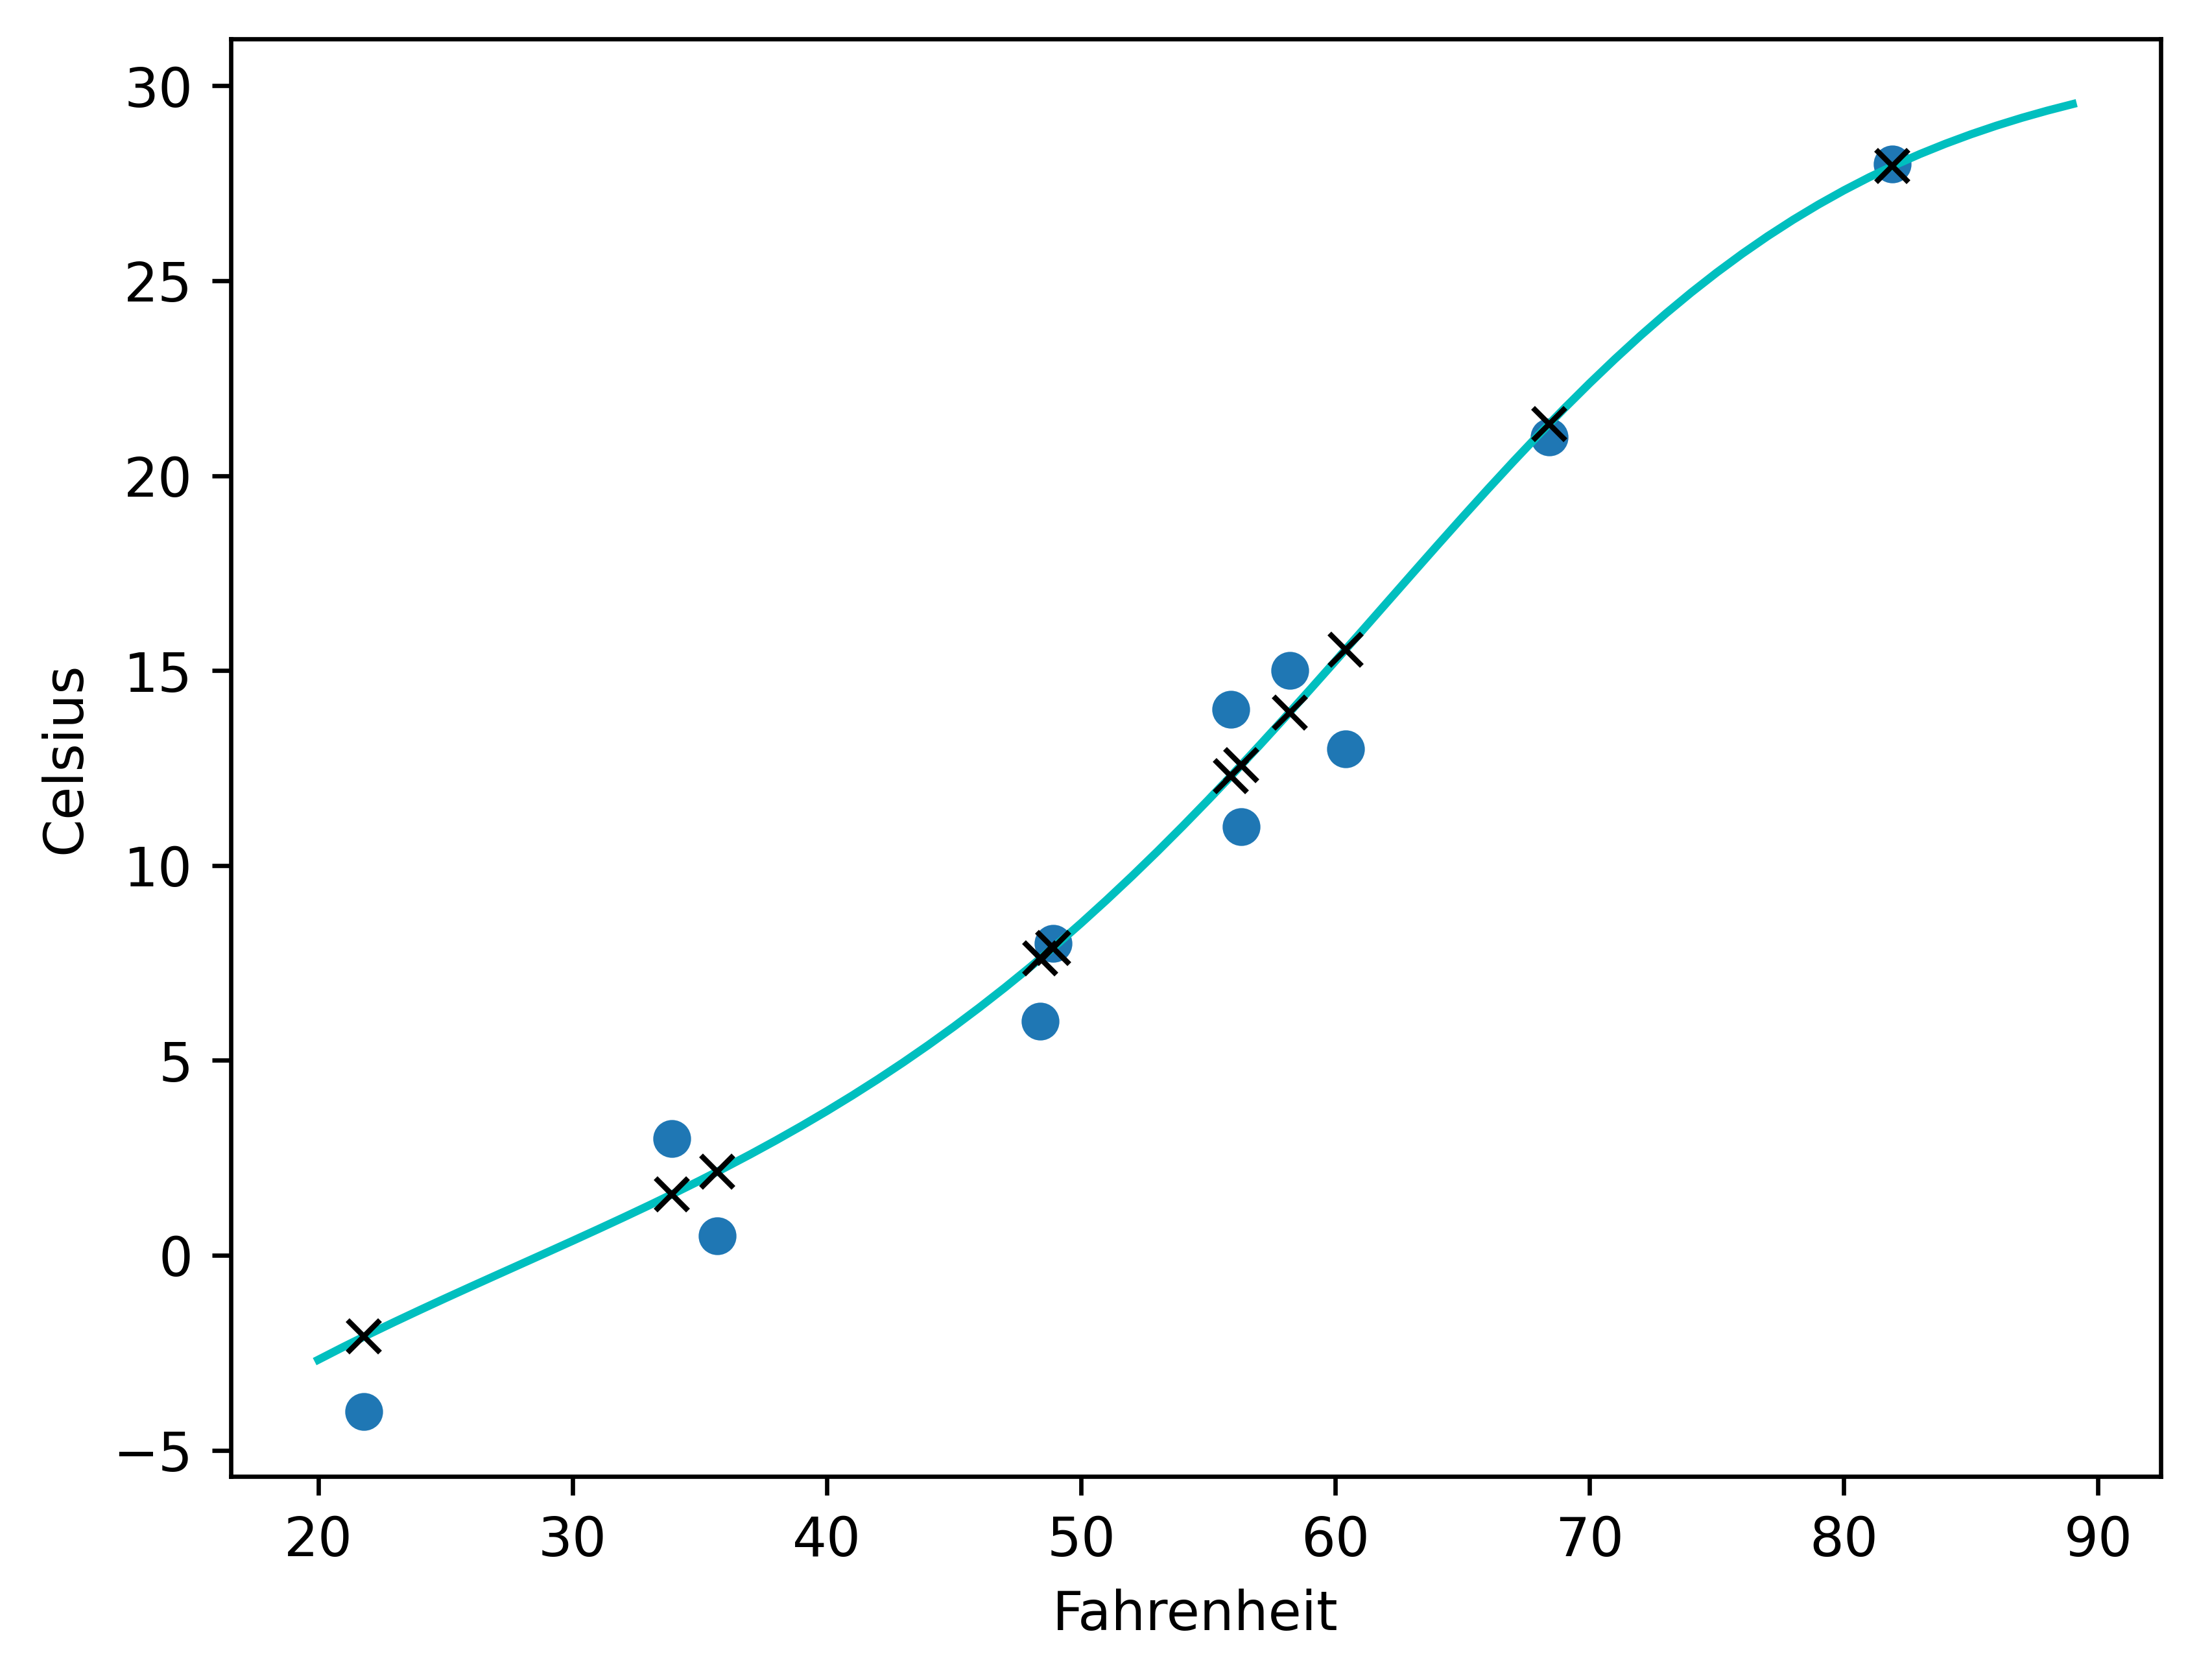

In [48]:
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')